# TTC Delay Data EDA

## Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

First, we need to process data for year 2017 since it is recorded in two separate files.

In [6]:
ttc_2017_1 = pd.read_excel('raw_data/subway_delay_data/ttc-subway-delay-jan-2014-april-2017.xlsx')
ttc_2017_1 = ttc_2017_1[ttc_2017_1['Date'].dt.year >= 2017]
ttc_2017_1

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
63060,2017-01-01,00:29,Sunday,KENNEDY BD STATION,MUSC,0,0,W,BD,5159
63061,2017-01-01,01:35,Sunday,ISLINGTON STATION,MUSC,0,0,E,BD,5296
63062,2017-01-01,03:00,Sunday,LAWRENCE STATION,EUDO,4,8,S,YU,6056
63063,2017-01-01,04:06,Sunday,GREENWOOD YARD,SUUT,0,0,NaN,BD,0
63064,2017-01-01,04:20,Sunday,YONGE SHP STATION,PUCSS,0,0,W,SHP,6171
...,...,...,...,...,...,...,...,...,...,...
69011,2017-04-30,19:50,Sunday,BLOOR DANFORTH SUBWAY,MUO,0,0,NaN,BD,0
69012,2017-04-30,20:25,Sunday,WARDEN STATION,SUDP,4,8,W,BD,5107
69013,2017-04-30,20:29,Sunday,KEELE STATION,SUROB,0,0,NaN,BD,0
69014,2017-04-30,22:00,Sunday,YONGE UNIVERSITY LINE,MUO,0,0,NaN,YU/BD,0


In [7]:
ttc_2017_MayToDec = pd.ExcelFile('/content/ttc-subway-delay-may-december-2017.xlsx')
sheet_names = ttc_2017_MayToDec.sheet_names
all_sheets_dfs = []
for sheet_name in sheet_names:
    df = ttc_2017_MayToDec.parse(sheet_name)
    all_sheets_dfs.append(df)
combined_df_2017 = pd.concat(all_sheets_dfs, ignore_index=True)
combined_df_2017 = pd.concat([ttc_2017_1, combined_df_2017], ignore_index=True)
combined_df_2017

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
0,2017-01-01,00:29,Sunday,KENNEDY BD STATION,MUSC,0,0,W,BD,5159
1,2017-01-01,01:35,Sunday,ISLINGTON STATION,MUSC,0,0,E,BD,5296
2,2017-01-01,03:00,Sunday,LAWRENCE STATION,EUDO,4,8,S,YU,6056
3,2017-01-01,04:06,Sunday,GREENWOOD YARD,SUUT,0,0,NaN,BD,0
4,2017-01-01,04:20,Sunday,YONGE SHP STATION,PUCSS,0,0,W,SHP,6171
...,...,...,...,...,...,...,...,...,...,...
18880,2017-12-31,23:24,Sunday,KEELE STATION,SUUT,0,0,W,BD,5245
18881,2017-12-31,23:44,Sunday,BAY STATION,PUMEL,0,0,NaN,BD,0
18882,2017-12-31,23:44,Sunday,WARDEN STATION,MUSC,0,0,W,BD,5225
18883,2017-12-31,23:58,Sunday,GLENCAIRN STATION,SUUT,10,14,S,YU,5576


In [8]:
ttc_2018 = pd.ExcelFile('raw_data/subway_delay_data/ttc-subway-delay-data-2018.xlsx')
sheet_names = ttc_2018.sheet_names
all_sheets_dfs = []
for sheet_name in sheet_names:
    df = ttc_2018.parse(sheet_name)
    all_sheets_dfs.append(df)
combined_df_2018 = pd.concat(all_sheets_dfs, ignore_index=True)
combined_df_2018

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
0,2018-01-01,00:29,Monday,SHEPPARD WEST STATION,MUATC,10,15,N,YU,5986
1,2018-01-01,01:07,Monday,DUNDAS STATION,MUNCA,0,0,NaN,YU,0
2,2018-01-01,01:22,Monday,MUSEUM STATION,MUSC,0,0,N,YU,5751
3,2018-01-01,01:28,Monday,BAY LOWER,EUOE,0,0,NaN,BD,5222
4,2018-01-01,01:39,Monday,MUSEUM STATION,MUO,6,11,S,YU,5781
...,...,...,...,...,...,...,...,...,...,...
20732,2018-12-31,22:34,Monday,DUNDAS STATION,PUMST,0,0,NaN,YU,0
20733,2018-12-31,22:36,Monday,DUNDAS STATION,SUDP,3,6,N,YU,5881
20734,2018-12-31,23:08,Monday,BLOOR STATION,MUIRS,0,0,NaN,YU,0
20735,2018-12-31,23:21,Monday,QUEEN'S PARK STATION,TUSC,0,0,S,YU,5841


In [9]:
ttc_2019 = pd.ExcelFile('raw_data/subway_delay_data/ttc-subway-delay-data-2019.xlsx')
sheet_names = ttc_2019.sheet_names
all_sheets_dfs = []
for sheet_name in sheet_names:
    df = ttc_2019.parse(sheet_name)
    all_sheets_dfs.append(df)
combined_df_2019 = pd.concat(all_sheets_dfs, ignore_index=True)
combined_df_2019

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
0,2019-01-01,01:08,Tuesday,YORK MILLS STATION,PUSI,0,0,S,YU,5766
1,2019-01-01,02:14,Tuesday,ST ANDREW STATION,PUMST,0,0,NaN,YU,0
2,2019-01-01,02:16,Tuesday,JANE STATION,TUSC,0,0,W,BD,5117
3,2019-01-01,02:27,Tuesday,BLOOR STATION,SUO,0,0,N,YU,5436
4,2019-01-01,03:03,Tuesday,DUPONT STATION,MUATC,11,16,N,YU,6061
...,...,...,...,...,...,...,...,...,...,...
19217,2019-12-31,22:54,Tuesday,FINCH STATION,SUAP,0,0,NaN,YU,0
19218,2019-12-31,23:09,Tuesday,SHERBOURNE STATION,EUBK,0,0,W,BD,5234
19219,2019-12-31,23:12,Tuesday,ST CLAIR WEST STATION,SUDP,0,0,NaN,YU,0
19220,2019-12-31,23:16,Tuesday,FINCH STATION,MUSC,0,0,S,YU,6066


In [10]:
ttc_2023 = pd.read_excel('raw_data/subway_delay_data/ttc-subway-delay-data-2023.xlsx')
ttc_2024 = pd.read_excel('raw_data/subway_delay_data/ttc-subway-delay-data-2024.xlsx')

In [11]:
ttc_2023

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
0,2023-01-01,02:22,Sunday,MUSEUM STATION,MUPAA,3,9,S,YU,5931
1,2023-01-01,02:30,Sunday,KIPLING STATION,MUIS,0,0,E,BD,5341
2,2023-01-01,02:33,Sunday,WARDEN STATION,SUO,0,0,W,BD,0
3,2023-01-01,03:17,Sunday,KEELE STATION,MUIS,0,0,NaN,BD,0
4,2023-01-01,07:16,Sunday,BATHURST STATION,MUIS,0,0,NaN,BD,0
...,...,...,...,...,...,...,...,...,...,...
22944,2023-12-31,12:25,Sunday,SHEPPARD-YONGE STATION,MUIR,7,14,W,SHP,6196
22945,2023-12-31,13:53,Sunday,BAYVIEW STATION,TUSC,0,0,E,SHP,6191
22946,2023-12-31,14:57,Sunday,SHEPPARD-YONGE STATION,MUO,51,58,W,SHP,6171
22947,2023-12-31,15:15,Sunday,BAYVIEW STATION,TUOPO,7,14,E,SHP,6141


In [12]:
ttc_2024

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
0,2024-01-01,02:00,Monday,SHEPPARD STATION,MUI,0,0,N,YU,5491
1,2024-01-01,02:00,Monday,DUNDAS STATION,MUIS,0,0,N,YU,0
2,2024-01-01,02:08,Monday,DUNDAS STATION,MUPAA,4,10,N,YU,6051
3,2024-01-01,02:13,Monday,KENNEDY BD STATION,PUTDN,10,16,E,BD,5284
4,2024-01-01,02:22,Monday,BLOOR STATION,MUPAA,4,10,N,YU,5986
...,...,...,...,...,...,...,...,...,...,...
17512,2024-08-31,01:25,Saturday,ST GEORGE YUS STATION,MUD,5,11,N,YU,5521
17513,2024-08-31,01:33,Saturday,DUNDAS STATION,SUO,13,19,N,YU,5816
17514,2024-08-31,01:37,Saturday,WARDEN STATION,PUSTC,3,9,E,BD,5060
17515,2024-08-31,16:52,Saturday,DON MILLS STATION,SUO,0,0,NaN,SHP,0


In [13]:
all_dfs = [combined_df_2017, combined_df_2018, combined_df_2019, ttc_2023, ttc_2024]
ttc_combined_df = pd.concat(all_dfs, ignore_index=True)
ttc_combined_df

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
0,2017-01-01,00:29,Sunday,KENNEDY BD STATION,MUSC,0,0,W,BD,5159
1,2017-01-01,01:35,Sunday,ISLINGTON STATION,MUSC,0,0,E,BD,5296
2,2017-01-01,03:00,Sunday,LAWRENCE STATION,EUDO,4,8,S,YU,6056
3,2017-01-01,04:06,Sunday,GREENWOOD YARD,SUUT,0,0,NaN,BD,0
4,2017-01-01,04:20,Sunday,YONGE SHP STATION,PUCSS,0,0,W,SHP,6171
...,...,...,...,...,...,...,...,...,...,...
99305,2024-08-31,01:25,Saturday,ST GEORGE YUS STATION,MUD,5,11,N,YU,5521
99306,2024-08-31,01:33,Saturday,DUNDAS STATION,SUO,13,19,N,YU,5816
99307,2024-08-31,01:37,Saturday,WARDEN STATION,PUSTC,3,9,E,BD,5060
99308,2024-08-31,16:52,Saturday,DON MILLS STATION,SUO,0,0,NaN,SHP,0


In [14]:
# Now, we check for NaN/null values in the dataframe
ttc_combined_df.isnull().sum()

,0
Date,0
Time,0
Day,0
Station,0
Code,1
Min Delay,0
Min Gap,0
Bound,27776
Line,265
Vehicle,0


In [15]:
# Since code explains the reasons of delay, which is crucial for our analysis and does not take up a large proportion of data,
# we will negate the line with missing code.
ttc_combined_df = ttc_combined_df.dropna(subset=['Code'])
ttc_combined_df.isnull().sum()

,0
Date,0
Time,0
Day,0
Station,0
Code,0
Min Delay,0
Min Gap,0
Bound,27776
Line,265
Vehicle,0


## Visualizations

### Plot 1: Bar Graph - delay count by day of week

In [16]:
delay_df = ttc_combined_df[ttc_combined_df['Min Delay'] > 0]
delay_counts_by_day = delay_df.groupby('Day').size().reset_index(name='Count')
delay_counts_by_day

,Day,Count
0,Friday,5438
1,Monday,5188
2,Saturday,4016
3,Sunday,3367
4,Thursday,5226
5,Tuesday,5304
6,Wednesday,5362


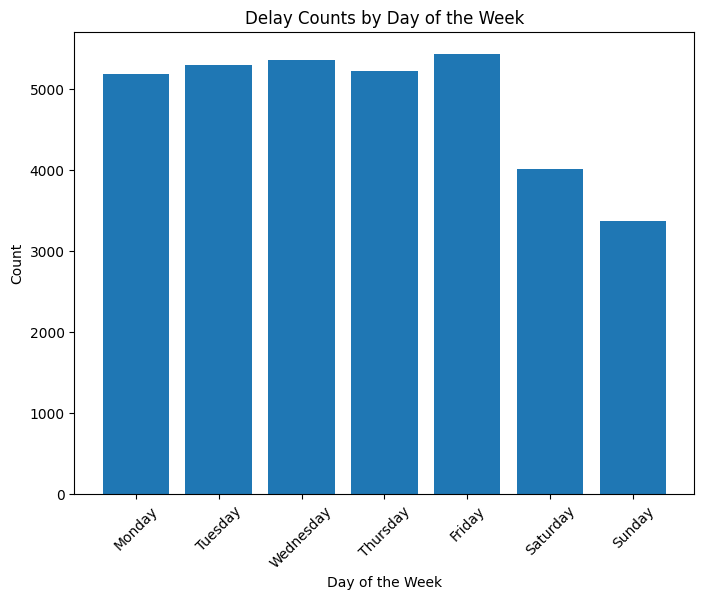

In [17]:
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
delay_counts_by_day['Day'] = pd.Categorical(delay_counts_by_day['Day'], categories=ordered_days, ordered=True)
delay_counts_by_day = delay_counts_by_day.sort_values('Day')

plt.figure(figsize=(8, 6))
plt.bar(delay_counts_by_day['Day'], delay_counts_by_day['Count'])
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.title('Delay Counts by Day of the Week')
plt.xticks(rotation=45)
plt.show()

### Plot 2: Time Series Graph - Total Minutes of Delay by Day (across the span of dates provided by the data)

In [18]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

ttc_combined_df.set_index('Date', inplace=True)

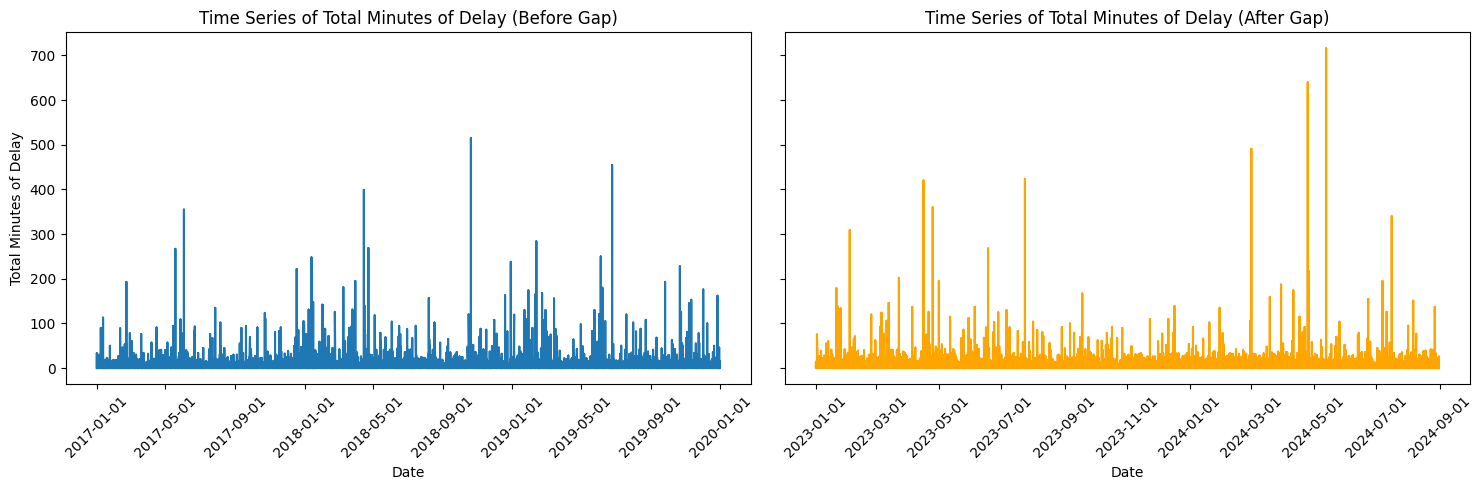

In [19]:
# Filtering out the missing data range
df_before_gap = ttc_combined_df[(ttc_combined_df.index < '2020-01-01')]
df_after_gap = ttc_combined_df[(ttc_combined_df.index >= '2023-01-01')]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

# Plotting the range before the gap on the first subplot
ax1.plot(df_before_gap.index, df_before_gap['Min Delay'])
ax1.set_title('Time Series of Total Minutes of Delay (Before Gap)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Minutes of Delay')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.tick_params(axis='x', rotation=45)

# Plotting the range after the gap on the second subplot
ax2.plot(df_after_gap.index, df_after_gap['Min Delay'], color = 'orange')
ax2.set_title('Time Series of Total Minutes of Delay (After Gap)')
ax2.set_xlabel('Date')
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax2.tick_params(axis='x', rotation=45)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [20]:
# In-depth investigation of the reasons of anomoly delays (very long delays)
extreme_delays = ttc_combined_df[ttc_combined_df['Min Delay'] > 200]
extreme_delay_codes = pd.DataFrame(extreme_delays['Code'].value_counts())
extreme_delay_codes.reset_index(inplace=True)
extreme_delay_codes.columns = ['Code', 'Count']
extreme_delay_codes

,Code,Count
0,MUPR1,3
1,MRWEA,3
2,MUPLB,2
3,PUTR,2
4,SUPOL,2
5,ERHV,1
6,EUCD,1
7,PUTSM,1
8,ERCO,1
9,ERBO,1


In [21]:
ttc_delay_code = pd.read_excel('raw_data/subway_delay_data/ttc-subway-delay-codes.xlsx')
ttc_delay_code

,SUB RMENU CODE,CODE DESCRIPTION
0,EUAC,Air Conditioning
1,EUAL,Alternating Current
2,EUATC,ATC RC&S Equipment
3,EUBK,Brakes
4,EUBO,Body
...,...,...
195,TRNOA,No Operator Immediately Available
196,TRO,Transportation Department - Other
197,TRSET,Train Controls Improperly Shut Down
198,TRST,Storm Trains


In [22]:
merged_with_delay_code = extreme_delay_codes.merge(ttc_delay_code[['SUB RMENU CODE', 'CODE DESCRIPTION']], left_on='Code', right_on='SUB RMENU CODE', how='left')
merged_with_delay_code

,Code,Count,SUB RMENU CODE,CODE DESCRIPTION
0,MUPR1,3,MUPR1,Priority One - Train in Contact With Person
1,MRWEA,3,MRWEA,Weather Reports / Related Delays
2,MUPLB,2,MUPLB,Fire/Smoke Plan B - Source TTC
3,PUTR,2,PUTR,Rail Related Problem
4,SUPOL,2,SUPOL,Held By Polce - Non-TTC Related
5,ERHV,1,ERHV,High Voltage
6,EUCD,1,EUCD,Consequential Delay (2nd Delay Same Fault)
7,PUTSM,1,PUTSM,Track Switch Failure - Track Related Problem
8,ERCO,1,ERCO,Couplers
9,ERBO,1,ERBO,Body


As seen here, the table reveals that the top reasons for delays over 200 minutes are primarily safety and environmental factors. Although the leading cause is "Priority One - Train in Contact With Person," it is followed by "Weather Reports / Related Delays," reflecting how extreme weather conditions—both hot and cold—significantly impact transit operations. Other major causes include "Fire/Smoke Plan B," "Rail Related Problem," and "Police Holds," each contributing to extended disruptions. Overall, extreme weather and emergency incidents are key drivers of prolonged delays in transit.

### Plot 3: Bar Graph - Frequency of TTC Stations' Delays

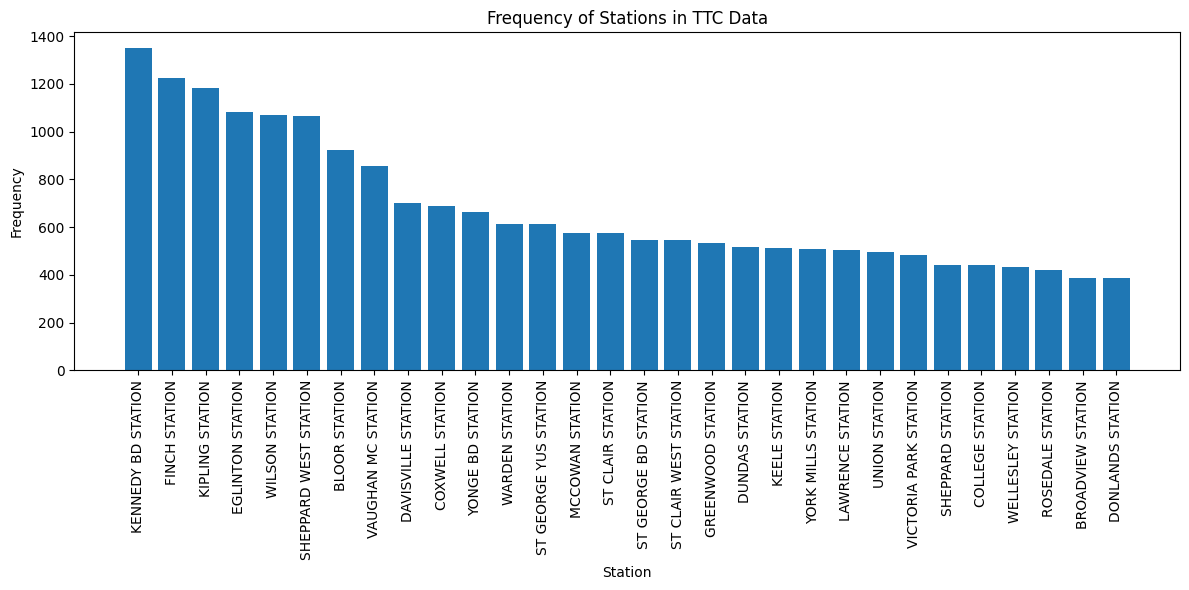

In [23]:
# Count the frequency of each station
station_counts = delay_df['Station'].value_counts()
station_counts = station_counts[:30] # Top 30 delay count stations
# Create a bar plot
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.bar(station_counts.index, station_counts.values)
plt.xlabel('Station')
plt.ylabel('Frequency')
plt.title('Frequency of Stations in TTC Data')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()